In [34]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [35]:
t = smp.symbols("t")
m = smp.symbols("m")
k = smp.symbols("k")

#b= 0.2

#IMPPPPP these are coords, not displacements about mean, the PE breaks down or elseee
x1, x2, x3, x4 = smp.symbols("x1 x2 x3 x4", cls = smp.Function)
y1, y2, y3, y4 = smp.symbols("y1 y2 y3 y4", cls = smp.Function)

L0 = 1 #length of the springs (they are all the same)
L0_diag = L0*smp.sqrt(2)

#Masses are like :  m1--m2
#                   |   |
#                   m3--m4

In [36]:
x1 = x1(t)
x2 = x2(t)
x3 = x3(t)
x4 = x4(t)

y1 = y1(t)
y2 = y2(t)
y3 = y3(t)
y4 = y4(t)

x1_d = smp.diff(x1,t)
x2_d = smp.diff(x2,t)
x3_d = smp.diff(x3,t)
x4_d = smp.diff(x4,t)

y1_d = smp.diff(y1,t)
y2_d = smp.diff(y2,t)
y3_d = smp.diff(y3,t)
y4_d = smp.diff(y4,t)

x1_dd = smp.diff(x1_d,t)
x2_dd = smp.diff(x2_d,t)
x3_dd = smp.diff(x3_d,t)
x4_dd = smp.diff(x4_d,t)

y1_dd = smp.diff(y1_d,t)
y2_dd = smp.diff(y2_d,t)
y3_dd = smp.diff(y3_d,t)
y4_dd = smp.diff(y4_d,t)


In [37]:
#Massive discovery, PE is not simple, you need absolute coordinates and use pythagoras, dx dy wont do...

In [38]:

def get_ke(m,vx,vy):
    temp = 0.5*m*(vx**2 + vy**2)
    return temp

def get_pe(k,dx,dy):
    temp = 0.5*k*(dx**2+dy**2)
    return temp

def get_disp(x1,x2,y1,y2,l):
    return smp.sqrt((x1-x2)**2+(y1-y2)**2) - l

ke = sum([get_ke(*x) for x in [(m,x1_d,y1_d), (m,x2_d,y2_d), (m,x3_d,y3_d), (m,x4_d,y4_d)]])
#pe = [get_pe(*x) for x in [(k1,(x1,y1,x2,y2)),(k2,x2-x1,y2-y4),(k3,x3-x4,y3-y1),(k4,x4-x3,y4-y2)]]


pe1 = 0.5*k*(get_disp(x1,x2,y1,y2,L0)**2)
pe2 = 0.5*k*(get_disp(x2,x4,y2,y4,L0)**2)
pe3 = 0.5*k*(get_disp(x1,x3,y1,y3,L0)**2) 
pe4 = 0.5*k*(get_disp(x3,x4,y3,y4,L0)**2)

#TODO check if solids interact diagonally
#extra pe terms for the diagonal, gives more rigidity, diagonals are also going to interact in this assumption
#this assumption makes sense if it is a tight solid (maybe)
pe5 = 0.5*k*(get_disp(x1,x4,y1,y4,L0_diag)**2)
pe6 = 0.5*k*(get_disp(x2,x3,y2,y3,L0_diag)**2)

pe = pe1+pe2+pe3+pe4+pe5+pe6

Lag = ke - pe




In [39]:
#this is gemini's recommended way to handle 8 ELs. no credit taken for this
coords = [x1, y1, x2, y2, x3, y3, x4, y4]
vels = [x1_d, y1_d, x2_d, y2_d, x3_d, y3_d, x4_d, y4_d]
accels = [x1_dd, y1_dd, x2_dd, y2_dd, x3_dd, y3_dd, x4_dd, y4_dd]

# Generate the 8 equations
EL = [smp.diff(smp.diff(Lag, v), t) - smp.diff(Lag, c) for v, c in zip(vels, coords)]


In [40]:
EL = [smp.simplify(mem) for mem in EL]
sols = smp.solve(EL, accels)

In [41]:
sols[x1_dd].args

(k*x2(t)/m,
 k*x3(t)/m,
 k*x4(t)/m,
 -3.0*k*x1(t)/m,
 k*x1(t)/(m*sqrt(x1(t)**2 - 2.0*x1(t)*x2(t) + x2(t)**2 + y1(t)**2 - 2.0*y1(t)*y2(t) + y2(t)**2)),
 k*x1(t)/(m*sqrt(x1(t)**2 - 2.0*x1(t)*x3(t) + x3(t)**2 + y1(t)**2 - 2.0*y1(t)*y3(t) + y3(t)**2)),
 -k*x2(t)/(m*sqrt(x1(t)**2 - 2.0*x1(t)*x2(t) + x2(t)**2 + y1(t)**2 - 2.0*y1(t)*y2(t) + y2(t)**2)),
 -k*x3(t)/(m*sqrt(x1(t)**2 - 2.0*x1(t)*x3(t) + x3(t)**2 + y1(t)**2 - 2.0*y1(t)*y3(t) + y3(t)**2)),
 1.4142135623731*k*x1(t)/(m*sqrt(x1(t)**2 - 2.0*x1(t)*x4(t) + x4(t)**2 + y1(t)**2 - 2.0*y1(t)*y4(t) + y4(t)**2)),
 -1.4142135623731*k*x4(t)/(m*sqrt(x1(t)**2 - 2.0*x1(t)*x4(t) + x4(t)**2 + y1(t)**2 - 2.0*y1(t)*y4(t) + y4(t)**2)))

In [42]:
args = (x1,x2,x3,x4,
        y1,y2,y3,y4,
        x1_d,x2_d,x3_d,x4_d,
        y1_d,y2_d,y3_d,y4_d,
        m,
        k)

funcs = [sols[x1_dd],sols[x2_dd],sols[x3_dd],sols[x4_dd],sols[y1_dd],sols[y2_dd],sols[y3_dd],sols[y4_dd]]

sols_f = smp.lambdify(args, funcs, "numpy")

In [ ]:
#remember to flatten after solving !!!

# def mag(a,b):
#     return np.sqrt(a**2 + b**2)

###My state vector = (x1,x2,x3,x4,
                    # y1,y2,y3,y4,
                    # x1_d,x2_d,x3_d,x4_d,
                    # y1_d,y2_d,y3_d,y4_d,)
def dsdt(state, t, m, k, b):
    acc_values_cols = sols_f(*state,m,k)

    acc_values_list = np.array(acc_values_cols).flatten()

    x1_d = state[8]
    x2_d = state[9]
    x3_d = state[10]
    x4_d = state[11]

    y1_d = state[12]
    y2_d = state[13]
    y3_d = state[14]
    y4_d = state[15]

    x1_dd = acc_values_list[0] - b*x1_d/m
    x2_dd = acc_values_list[1] - b*x2_d/m
    x3_dd = acc_values_list[2] - b*x3_d/m
    x4_dd = acc_values_list[3] - b*x4_d/m

    y1_dd = acc_values_list[4] - b*y1_d/m
    y2_dd = acc_values_list[5] - b*y2_d/m
    y3_dd = acc_values_list[6] - b*y3_d/m
    y4_dd = acc_values_list[7] - b*y4_d/m


    return x1_d, x2_d, x3_d, x4_d, y1_d, y2_d, y3_d, y4_d, x1_dd, x2_dd, x3_dd, x4_dd, y1_dd,y2_dd, y3_dd, y4_dd



In [44]:
t = np.linspace(0,50,1000)
k_v = 1
b_v = 0.2
m_v = 1

xcoords_list_init = (0,1,0,1)
ycoords_list_init = (0,0,-1,-1)

xvel_list_init = (0,0,0,0.5)
yvel_list_init = (0,0,0,0.2) 

initial = (*xcoords_list_init, *ycoords_list_init, *xvel_list_init, *yvel_list_init)

solutions = odeint(dsdt, initial, t=t, args=(m_v, k_v, b_v) )


In [47]:
x1_c = solutions[:,0]
x2_c = solutions[:,1]
x3_c = solutions[:,2]
x4_c = solutions[:,3]

y1_c = solutions[:,4]
y2_c = solutions[:,5]
y3_c = solutions[:,6]
y4_c = solutions[:,7]

# vx1_list = solutions[:,8]
# vx2_list = solutions[:,9]
# vx3_list = solutions[:,10]
# vx4_list = solutions[:,11]

# vy1_list = solutions[:,12]
# vy2_list = solutions[:,13]
# vy3_list = solutions[:,14]
# vy4_list = solutions[:,15]

vel_list = solutions[:,8:]

KE = 0.5*np.sum(m_v*vel_list**2,axis = 1)

PE1= 0.5*k_v*(np.sqrt(((x1_c - x2_c)**2 + (y1_c-y2_c)**2))-L0)**2
PE2 = 0.5*k_v*(np.sqrt((x2_c-x4_c)**2 + (y2_c-y4_c)**2)-L0)**2
PE3 = 0.5*k_v*(np.sqrt((x3_c-x4_c)**2 + (y3_c-y4_c)**2)-L0)**2
PE4 = 0.5*k_v*(np.sqrt((x1_c-x3_c)**2 + (y1_c-y3_c)**2)-L0)**2

PE5 = 0.5*k_v*(np.sqrt((x1_c-x4_c)**2 + (y1_c-y4_c)**2)-L0_diag)**2
PE6 = 0.5*k_v*(np.sqrt((x2_c-x3_c)**2 + (y2_c-y3_c)**2)-L0_diag)**2

PE = PE1+PE2+PE3+PE4+PE5+PE6

TotalE = KE + PE

TotalE

array([1.0*(1.4142135623731 - sqrt(2))**2 + 0.145,
       0.5*(1.41420903240559 - sqrt(2))**2 + 0.5*(1.4249775774865 - sqrt(2))**2 + 0.142070796569529,
       0.5*(1.41417658242633 - sqrt(2))**2 + 0.5*(1.43596590976606 - sqrt(2))**2 + 0.139094094271161,
       0.5*(1.41408662183529 - sqrt(2))**2 + 0.5*(1.44707307297384 - sqrt(2))**2 + 0.136080008355545,
       0.5*(1.41390833380977 - sqrt(2))**2 + 0.5*(1.45819235920989 - sqrt(2))**2 + 0.133041908147818,
       0.5*(1.41361043087401 - sqrt(2))**2 + 0.5*(1.4692170696844 - sqrt(2))**2 + 0.129996135546648,
       0.5*(1.41316189663713 - sqrt(2))**2 + 0.5*(1.48004171523141 - sqrt(2))**2 + 0.126961650707974,
       0.5*(1.41253274299262 - sqrt(2))**2 + 0.5*(1.49056316418406 - sqrt(2))**2 + 0.123959499131581,
       0.5*(1.41169479538085 - sqrt(2))**2 + 0.5*(1.50068177736619 - sqrt(2))**2 + 0.121012155088157,
       0.5*(1.4106223850157 - sqrt(2))**2 + 0.5*(1.51030241181319 - sqrt(2))**2 + 0.118142776911843,
       0.5*(1.40929305894848 - sqr

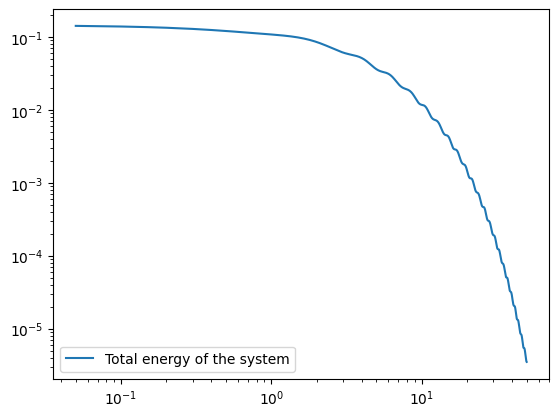

In [48]:
plt.figure()
plt.loglog(t[1:],TotalE[1:], label = "Total energy of the system")
plt.legend()
plt.show()